# **Airline satisfaction dataset simple logistic regression using R**

In [ ]:
R.version.string

[1] "R version 4.0.5 (2021-03-31)"

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
installed.packages()

In [ ]:
library(data.table)
df_cleaned_R<-fread("/content/Data_whole_cleaned.csv")
df_cleaned_R


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




V1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,⋯,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,⋯,5,5,5,5,2,5,5,50,44,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,⋯,4,4,4,4,3,4,5,0,0,1
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,⋯,2,4,1,3,2,2,2,0,0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,⋯,1,1,1,1,3,1,4,0,6,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,⋯,2,2,2,2,4,2,4,0,20,1
5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,⋯,5,4,3,1,1,2,5,0,0,1
6,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,⋯,5,5,5,5,4,5,3,0,0,1
7,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,⋯,4,4,4,4,5,4,3,77,65,1
8,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,⋯,5,2,2,5,3,3,5,1,0,1


In [ ]:
df_cleaned_R<-dplyr::select(df_cleaned_R, -V1)

In [ ]:
df_cleaned_R

Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,⋯,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,⋯,5,5,5,5,2,5,5,50,44,1
Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,⋯,4,4,4,4,3,4,5,0,0,1
Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,⋯,2,4,1,3,2,2,2,0,0,0
Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,⋯,1,1,1,1,3,1,4,0,6,1
Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,⋯,2,2,2,2,4,2,4,0,20,1
Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,⋯,5,4,3,1,1,2,5,0,0,1
Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,⋯,5,5,5,5,4,5,3,0,0,1
Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,2,⋯,4,4,4,4,5,4,3,77,65,1
Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,2,⋯,5,2,2,5,3,3,5,1,0,1


In [ ]:
summary(df_cleaned_R)
table(df_cleaned_R$satisfaction)

    Gender          Customer Type           Age        Type of Travel    
 Length:129880      Length:129880      Min.   : 7.00   Length:129880     
 Class :character   Class :character   1st Qu.:27.00   Class :character  
 Mode  :character   Mode  :character   Median :40.00   Mode  :character  
                                       Mean   :39.43                     
                                       3rd Qu.:51.00                     
                                       Max.   :85.00                     
    Class           Flight Distance Inflight wifi service
 Length:129880      Min.   :  31    Min.   :0.000        
 Class :character   1st Qu.: 414    1st Qu.:2.000        
 Mode  :character   Median : 844    Median :3.000        
                    Mean   :1190    Mean   :2.729        
                    3rd Qu.:1744    3rd Qu.:4.000        
                    Max.   :4983    Max.   :5.000        
 Departure/Arrival time convenient Ease of Online booking Gate location  
 M


    0     1 
73452 56428 

In [ ]:
Logistic_df<- glm(formula = satisfaction ~   ., data=df_cleaned_R , family = "binomial")
summary(Logistic_df)


Call:
glm(formula = satisfaction ~ ., family = "binomial", data = df_cleaned_R)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8824  -0.4913  -0.1757   0.3882   4.0196  

Coefficients:
                                      Estimate Std. Error  z value Pr(>|z|)    
(Intercept)                         -7.819e+00  7.021e-02 -111.371  < 2e-16 ***
GenderMale                           6.220e-02  1.739e-02    3.578 0.000347 ***
`Customer Type`Loyal Customer        2.037e+00  2.663e-02   76.483  < 2e-16 ***
Age                                 -8.468e-03  6.352e-04  -13.332  < 2e-16 ***
`Type of Travel`Personal Travel     -2.734e+00  2.809e-02  -97.342  < 2e-16 ***
ClassEco                            -7.145e-01  2.289e-02  -31.214  < 2e-16 ***
ClassEco Plus                       -8.135e-01  3.700e-02  -21.985  < 2e-16 ***
`Flight Distance`                   -1.684e-05  1.009e-05   -1.670 0.095006 .  
`Inflight wifi service`              4.022e-01  1.023e-02   39.315  < 

## **Plot for infuential varibale **

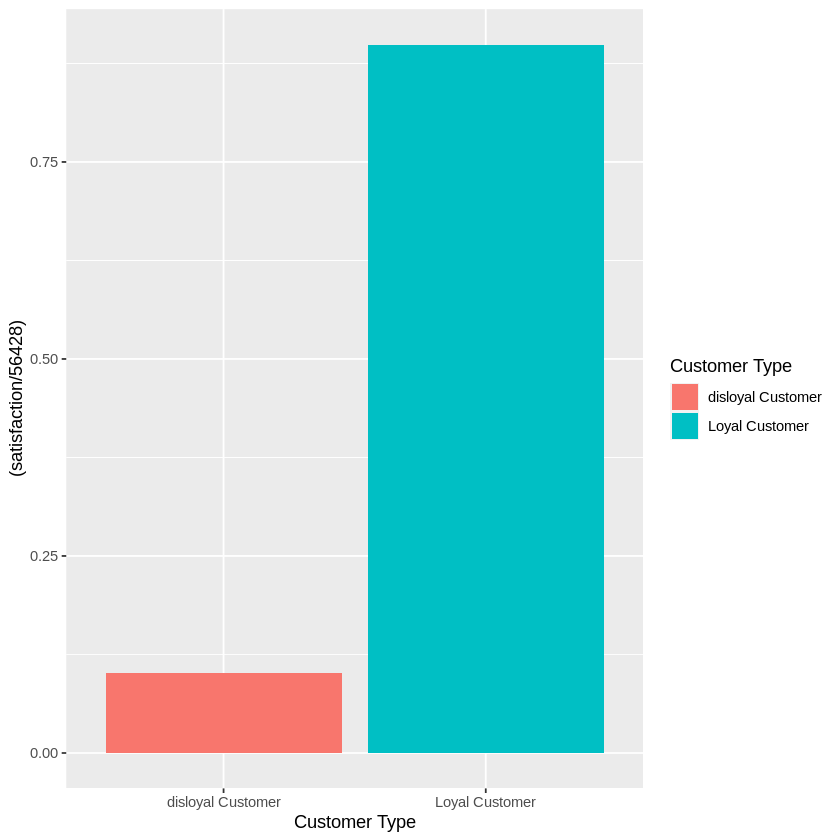

In [ ]:
Customer_Type_data<-dplyr::select(df_cleaned_R, `Customer Type`,satisfaction)
Customer_Type_Plot<-Customer_Type_data%>%
                    ggplot(aes(x=`Customer Type`,y=(satisfaction/56428 ),,fill=`Customer Type`))+
                    geom_bar(stat = "identity") 

Customer_Type_Plot